GRADES PREDICTION
------------------

IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_colwidth =None
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Grades.csv')

In [7]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [10]:
df['Seat No.'].unique()

array(['CS-97001', 'CS-97002', 'CS-97003', 'CS-97004', 'CS-97005',
       'CS-97006', 'CS-97007', 'CS-97008', 'CS-97009', 'CS-97010',
       'CS-97011', 'CS-97012', 'CS-97013', 'CS-97014', 'CS-97015',
       'CS-97016', 'CS-97017', 'CS-97018', 'CS-97019', 'CS-97020',
       'CS-97021', 'CS-97022', 'CS-97023', 'CS-97024', 'CS-97025',
       'CS-97026', 'CS-97027', 'CS-97028', 'CS-97029', 'CS-97030',
       'CS-97031', 'CS-97032', 'CS-97033', 'CS-97034', 'CS-97035',
       'CS-97036', 'CS-97037', 'CS-97038', 'CS-97039', 'CS-97040',
       'CS-97041', 'CS-97042', 'CS-97043', 'CS-97044', 'CS-97045',
       'CS-97046', 'CS-97047', 'CS-97048', 'CS-97049', 'CS-97050',
       'CS-97051', 'CS-97052', 'CS-97053', 'CS-97054', 'CS-97055',
       'CS-97056', 'CS-97057', 'CS-97058', 'CS-97059', 'CS-97060',
       'CS-97061', 'CS-97062', 'CS-97063', 'CS-97064', 'CS-97065',
       'CS-97066', 'CS-97067', 'CS-97068', 'CS-97069', 'CS-97070',
       'CS-97071', 'CS-97072', 'CS-97073', 'CS-97074', 'CS-970

SEAT NUMBER HAVE 571 UNIQUE VALUES AND ITS A SEQUENCE 

In [7]:
df.shape

(571, 43)

In [8]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

SINCE THE SEAT NUMBER OF THE CANDIDATE HAS NOTHING TO DO WITH THE CGPA SCORES SO WE WILL DROP THE SEATNUMBER COLUMN FROM THE DATASET

In [9]:
df.drop(['Seat No.'],axis=1,inplace=True)

CHECKING FOR THE NULLS IN THS DATSET

In [10]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

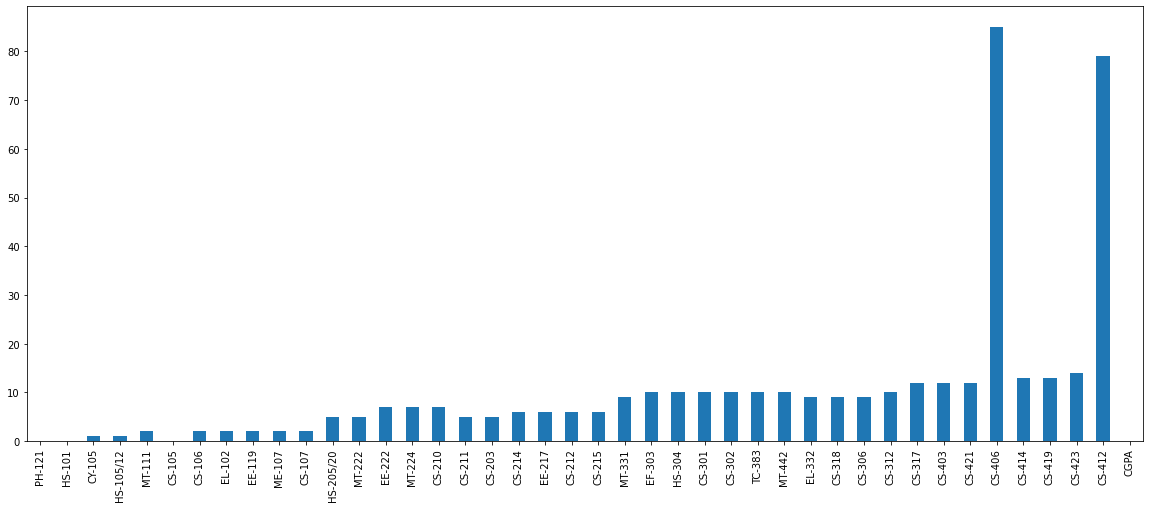

In [11]:
plt.figure(figsize=(20,8))
df.isnull().sum().plot(kind='bar')
plt.show()

#### SINCE THERE ARE SIGNIFICANT NUMBER OF NULLS WE HAVE TO IMPUTE THEM USING SUITABLE TECHNIQUES<br>
#### WE WILL BE USING SIMPLE IMPUTER WITH  STRATEGY AS "MOST FREQUENT"  TO FILL THE NULLS  

importing simple imputer library

In [12]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')


USING A FOR LOOP TO ITERATE OVER EACH COLUMNS AND FILL THE NULLS 

In [13]:
for i in df:
    if(df[i].isnull().sum()==0):
        print(f'\n\nNO NULL PRESENT IN {i}')
    else:
        df[i]=si.fit_transform(df[i].values.reshape(-1,1))



NO NULL PRESENT IN PH-121


NO NULL PRESENT IN HS-101


NO NULL PRESENT IN CS-105


NO NULL PRESENT IN CGPA


HENCE ALL THE NULLS HAVE BEEN FILLED USING SIMPLE IMPUTER MOST FREQUENT TECHNIQUE

In [14]:
df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [15]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

MAKING A DATAFRAME NAMED "DATA" CONSISTING OF <BR>
FEATURE NAME<BR>
NUMBER OF UNIQUE FEATURE <BR>
UNIQUE FEAYURE<BR>

initialising the lists which further will  be appended 

In [16]:
col_name=[]
num=[]
feat=[]

using a for loop to iterate over the dataset and append the lists

In [17]:
for i in df:
    col_name.append(i)
    num.append(len(df[i].unique()))
    feat.append(df[i].unique())

In [18]:
DATA=pd.DataFrame({'FEATURE':col_name,"NUMBER OF UNIQUE FEATURES":num,"UNIQUE FEATURES":feat})

In [19]:
DATA[:-1]

,FEATURE,NUMBER OF UNIQUE FEATURES,UNIQUE FEATURES
0,PH-121,13,"[B-, A, D, A-, B+, B, C+, C, C-, D+, WU, A+, F]"
1,HS-101,12,"[D+, D, B, C+, A-, B-, C-, B+, C, A, A+, F]"
2,CY-105,13,"[C-, D+, A, A-, B, C+, B+, B-, C, D, WU, A+, F]"
3,HS-105/12,13,"[C, D, B-, B+, D+, B, C-, C+, A-, A, WU, A+, F]"
4,MT-111,13,"[C-, B-, B+, D, A, C+, A-, C, B, D+, A+, F, WU]"
5,CS-105,11,"[D+, C, A, A-, B, B-, B+, C+, C-, A+, D]"
6,CS-106,13,"[D, B-, D+, A-, C+, A, C-, C, B, B+, A+, F, WU]"
7,EL-102,13,"[C-, A, B+, B, A-, B-, C, C+, D+, D, A+, WU, F]"
8,EE-119,12,"[B-, D+, A-, D, A, B+, B, C-, C+, C, WU, A+]"
9,ME-107,13,"[C-, D, A-, C+, B+, A, D+, C, B, B-, WU, F, A+]"


HENCE WE CAN SEE THAT THERE AT MAX 14 UNIQUE CATEGORIES PRESENT IN ANY COLUMN <BR>
    AND  TOTAL UNIQUE CATEGORIES PRESENT IN ALL OVER DATASET IS 15<BR>
MAJORLY CLASSIFIED AS <BR>
'A+'<BR>'A'<BR>'A-'<BR>'B+'<BR>'B'<BR>'B-'<BR>'C+'<BR>'C'<BR>'C-'<BR>'D+'<BR>'D'<BR>'F'<BR>'I'<BR>'W'<BR>'WU'

SPLITTING THE DATASET INTO FEATURES(INDEPENDENT VARIABLES)-X AND TARGET (DEPENDENT VARIABLE)-Y

In [20]:
x=df.drop(['CGPA'],axis=1)

y=df['CGPA']

PLOTS DESCRIBING THE COUNT OF UNIQUE CATEGORIES IN A FEATURE 

FUNCTION NAMED "WITHOUT_HUE" TO GET THE PERCENTAGE OF EACH CATEGORY PRESENT IN A PLOT

In [21]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10)

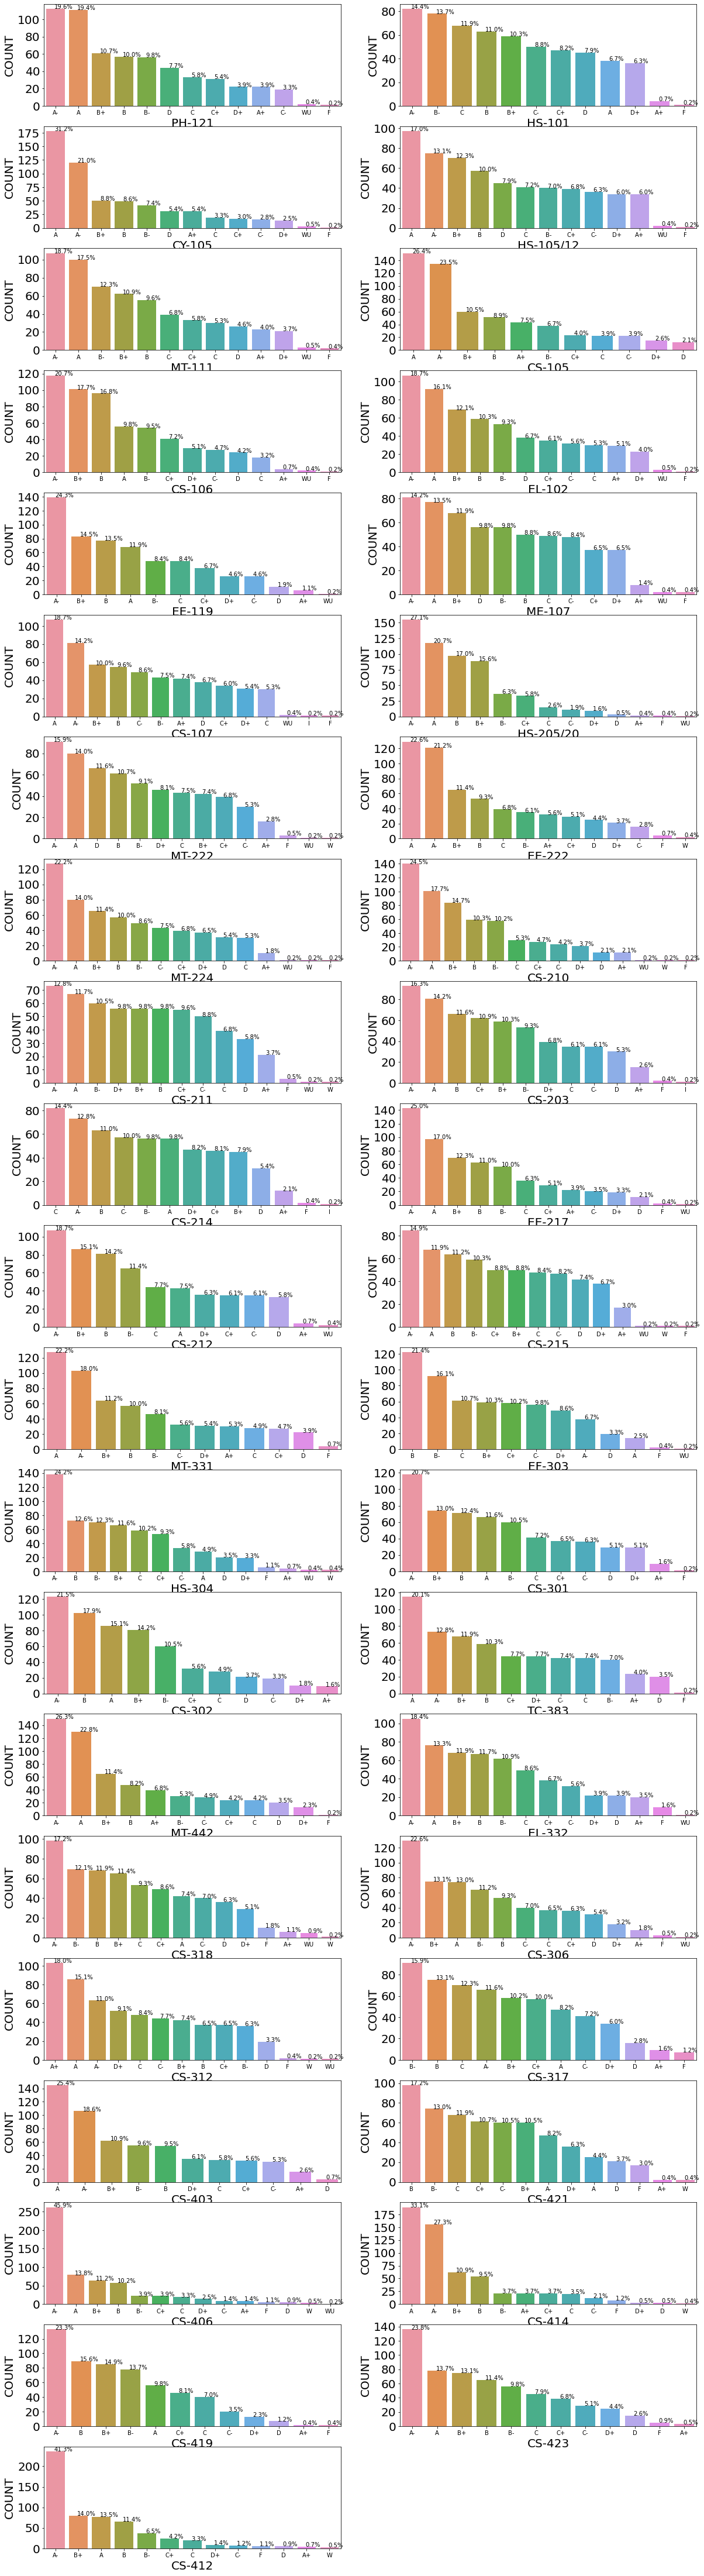

In [22]:
plt.figure(figsize=(20,80))
n=1
for i in x:
    if n<42:
        ax=plt.subplot(21,2,n)
        sns.countplot(x[i],order=x[i].value_counts().index)
        without_hue(ax,x[i])
        plt.xticks(size=10)
        plt.yticks(size=20)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('COUNT',fontsize=20)
    n+=1
plt.show()    

41 PLOTS DESCRIBING ABOUT THE DISTRIBUTION OF GRADES WITH PERCENTAGES IN A PAPER ARE SHOWN ABOVE

#### OBSERVATIONS<BR>

1) EXCEPT EXAMINATIONS  [CS-214,EF-303,CS-317,CS-421] ITS OBSERVED THAT MOST SECURED GRADE (COUNT) IN PERCENTAGES ALWAYS BELONG FROM [A,A+,A-] (ANY ONE THESE NOT NECCESARILY IN SAME ORDER)<BR>
    <BR>
        <BR>
2 ) CS-421 IS THE EXAMINATION WHICH HAVE THE MOST NUMBER OF F GRADES (ALMOST 3% STUDENTS GETTING A F GRADE HIGHEST FOR ANY PAPER)<BR>
            
3) CS-406 IS THE EXAMINATION HAVING MAXIMUM NUMBER OF STUDENTS SCORING A A+ GRADE (45.9%) 
       
                
4) PERCENTAGE OF STUDENTS GETTING A WU (WITHDRAWL UNAUTHORISED) GRADE IF IT EXITS IN A PAPER IS LYING IN A RANGE (0.2%-0.5%) DEICTING THAT VERY FEW STUDENTS ARE GETTING THAT GRADE 
                    
                        
5) PERCENTAGE OF STUDENTS GETTING A W  GRADE IF IT EXITS IN A PAPER IS LYING IN A RANGE (0.2%-0.5%) DEICTING THAT VERY FEW STUDENTS ARE GETTING THAT GRADE 
                            
6) IN EXAMINIATION EF-303 SECURING A A GRADE WAS MUCH TOUGHER AS ONLY 2.5 % OF STUDENTS GOT THAT AND 6.7 % STUDENTS GOT A A- GRADE WITH 21.4 % STUDENTS SECUIRNG A B GRADE IS THE MAXIMUM COUNT IN THAT PAPER
            
7) STUDENTS SECURING GRADE I IN CASE IT EXISTS IS ONLY LIMITED TO 0.2 % WHICH IS A VERY SMALL NUMBER OF STUDENTS
            
8) EXAMINATION CS-214 HAVE THE 14.4% OF STUDENTS SECURING A C GRDAE WHICH IS THE HIGHEST SECURED GRADE COUNT IN THAT PAPER
            
9) EXAMINATION CS-406 ,CS-412 HAVE A WIDE GAP BETWEEN WHAT THE MOST SECURED SECURED WITH THE SECOND MOST SECURED GRADE DEPICTING A CLEAR GAP IN THE PERCENTAGES MIGHT BE DUE TO TOUGHNESS OF THE PAPER
                            
    


LETS CHECK THE RELATIONSHIP OF EACH FEATURE WITH THE TARGET (CGPA) 

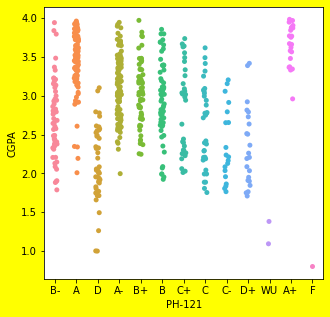

In [23]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.stripplot(x=x['PH-121'],y=df['CGPA'])
plt.show()

IT CAN BE OBSERVED THAT STUDENTS SECURING GRADE ARE HAVING HIGHER CGPA <BR>
SAM KIND OF PATTERN CAN BE OBSERVED FROM GRADE A-,B+<BR>
THOSE SCORING A GRADE D ARE LIKELY TO HAVE LOW CGPAS RANGING BETWEEN 1 TO 2.5 (MORE DENSE IN THE PLOT)

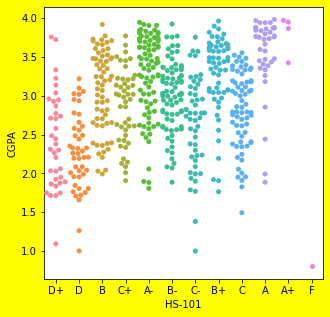

In [24]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.swarmplot(x=x['HS-101'],y=df['CGPA'])
plt.show()

students having a F are tending towrds a low cgpa<br>
those scoring A+ or A- are more likely to have cgpa between 3 to 4 as the region is more dense in that region of cgpa<br>
those scoring  a D+,D are more likely to have CGPA BETWEEN 1.5 TO 2   

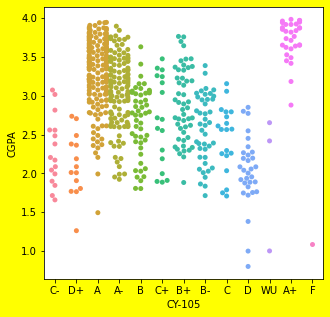

In [25]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.swarmplot(x=x['CY-105'],y=df['CGPA'])
plt.show()

CLEARLY VISIBLE THAT THOSE SECURING A+,A- HAVE A DENSER REGION IN CGPA 3.0 TO 4.0 DEPICTING A GOOD OVERALL PERFORMANCE OF THOSE STUDENTS<BR>
IT CAN BE SEEN THAT THOSE SECURING A A+ HAVE CLEAR HIGH CGPA BETWEEN 3.8 TO 4<BR>
GRADE FROM B TO D HAVE A MIXED REGION IN THE CGPA DEPICTING A BROADER AND AVERAGE REGION

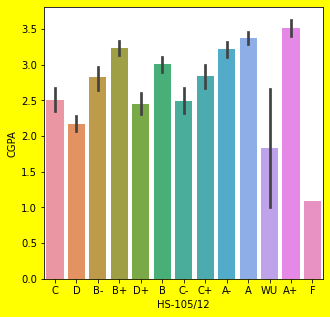

In [26]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.barplot(x=x['HS-105/12'],y=df['CGPA'])
plt.show()

QUIET SIGNIFICANT NUMBER OF STUDENTS HAVE A F GRADE IN THIS PAPER<BR>
AS PREVIOUS OBERSEVATION ITS ALSO SAME IN THIS FOR GRADE A+ SHOWING A HIGH CGPA NEAR 3.5<BR>


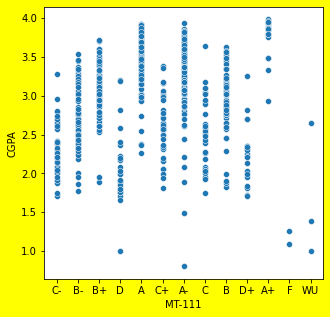

In [27]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.scatterplot(x=x['MT-111'],y=df['CGPA'])
plt.show()

NOTHING EXCEPTIONAL ABOUT THIS ONE TOO AS IT SHOWS SAME KIND OF DISTRIBUTION OF GRADES AND CORRESPONDING CGPA

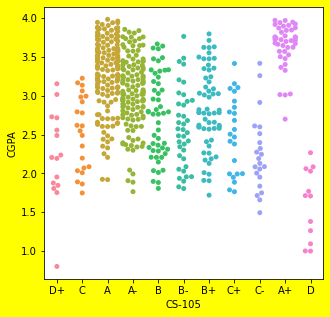

In [28]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.swarmplot(x=x['CS-105'],y=df['CGPA'])
plt.show()

THOSE SECCRING HIGHER GRADES ARE HAVING MORE CGPA AND IN THIS ONE A,A+ SHARES SAME REGION OF CGPA

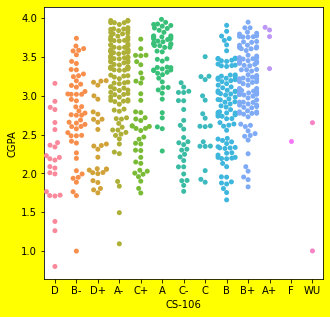

In [29]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.swarmplot(x=x['CS-106'],y=df['CGPA'])
plt.show()

ITS KIND OF UNIQUE IN THIS PAPER THAT THOSE SECURING A GRADE B+ TOO HAVE A HIGH CGPA EXPECTANCY <BR>
REST IS SAME AS THE PREVIOUS OBSERVATIONS

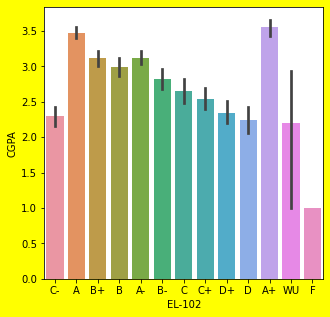

In [30]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.barplot(x=x['EL-102'],y=df['CGPA'])
plt.show()

 A FAIR PATTERN CAN BE OBSERVED AS GRADE DECRESES FROM A TO D THERE IS IS A GRADUAL DECREASE IN THE CGPA ATTAINED BY THE STUDENT WHICH IS QUIET EXPECTED AND LOGICAL<BR>
    THOUGH ITS ALSO VIBILE THAT THSOE GETTING A WU GRADE ARE MUCH HIGHER IN THIS PAPER AND THEY ARE TOO TENDING TOWARD A HIHER CGPA

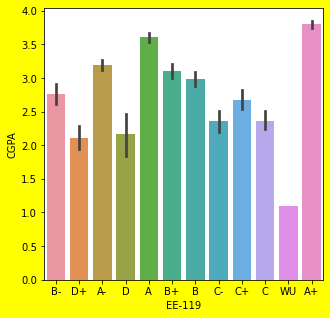

In [31]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.barplot(x=x['EE-119'],y=df['CGPA'])
plt.show()

FOLLOWS THE SAME PATTER AS THE PREVIOUS ONE

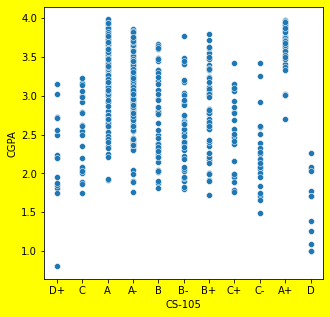

In [32]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.scatterplot(x=x['CS-105'],y=df['CGPA'])
plt.show()

SEQUENTIAL DECREMENT CAN BE SEEN AS THE GRADE DECRESES FROM A+TO D 

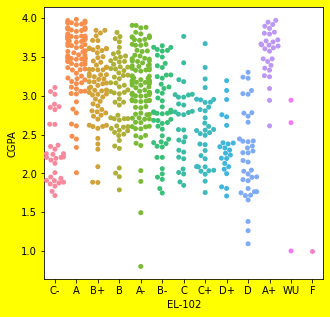

In [33]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.swarmplot(x=x['EL-102'],y=df['CGPA'])
plt.show()

DENSITY DECRESES AS WE SLIDE FROM A HIGHER GRADE TO A LOWER ONE WHICH IS WELL EXPECTED<BR>


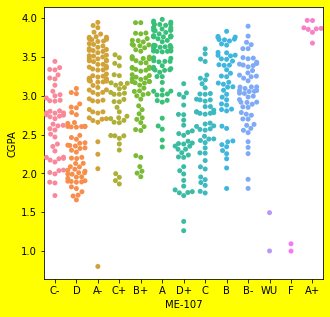

In [34]:
plt.figure(figsize=(5,5),facecolor='Yellow')
sns.swarmplot(x=x['ME-107'],y=df['CGPA'])
plt.show()

AS ALL ARE HAVING SAME KIND OF RELATONSHIPS <BR>
WE CAN ASSUME IT LIKE A PATTERN WHICH IS ALMOST SAME WITH LITTLE EXCEPTIONS EXISTING <BR>
SO WE CAN CONCLUDE THIS EDA NOW 

PLOTTING ALL THE FEATURES WITH THE TARGET IN A SINGLE PLOT
#### ALL THE FEATURES WITH THE TARGET(BARPLOTS) IN A SINGLE PLOT AS THE PATTERN OBSERVED IN SAME IN ALL THE PLOTS ABOVE AND HAVE SAME KIND OF OBSERVATIONS 

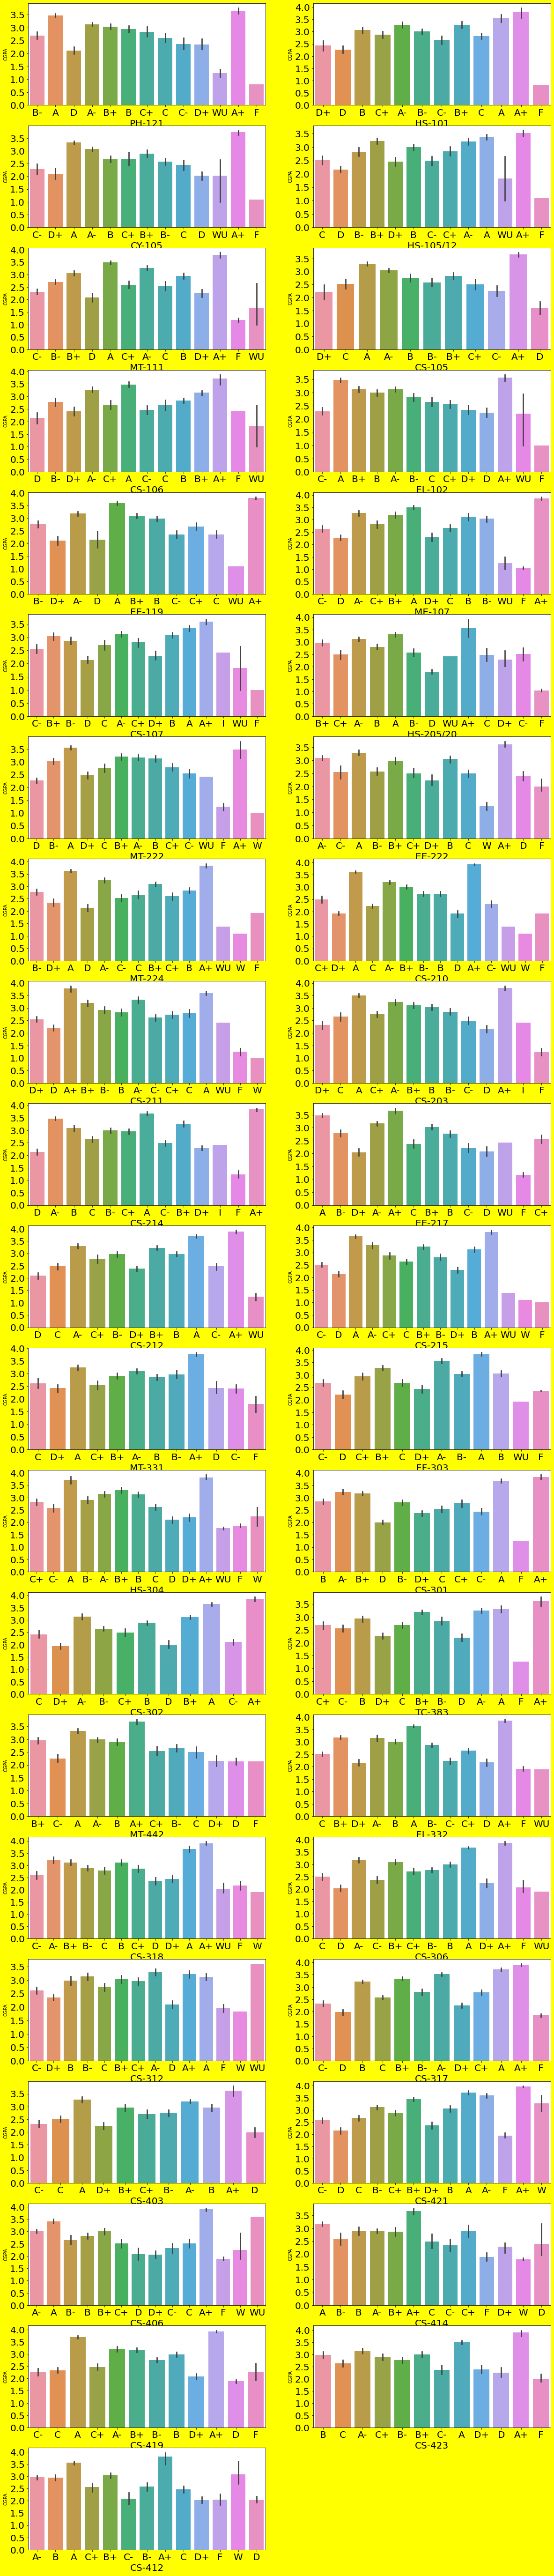

In [35]:
plt.figure(figsize=(20,100),facecolor='Yellow')
n=1
for i in x:
    if n<42:
        ax=plt.subplot(21,2,n)
        sns.barplot(x=x[i],y=df['CGPA'])
        plt.xlabel(i,fontsize=20)
        plt.xticks(size=20)
        plt.yticks(size=20)
    n+=1
plt.show()  

ALL THE FEATURES HAVE BEEN PLOTTED AS A BARPLOT WITH THE TARGET

#### ORDINAL ENCODING AS THE GRADES FOLLOW A ORDINAL ORDER FROM HIGH TO LOW

In [36]:
from sklearn.preprocessing import OrdinalEncoder

GRADES ARE ORDERED AS FROM A HIGH TO LOW AS <BR>
#### ['A+',  'A',  'A-',  'B+',  'B',  'B-',  'C+',  'C',  'C-'  ,'D+'  ,'D'  ,'F'  ,'I'  ,'W'  ,  'WU']
    

In [37]:
oe=OrdinalEncoder(categories=[['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','F','I','W','WU']])

USING A FOR LOOP ITERATE THROUGH EACH COLUMN AS TRANSFORM COLUMNS

In [38]:
for i in x:
    x[i]=oe.fit_transform(x[i].values.reshape(-1,1))

In [39]:
x.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5.0,9.0,8.0,7.0,8.0,9.0,10.0,8.0,5.0,8.0,...,7.0,8.0,8.0,8.0,8.0,2.0,1.0,8.0,4.0,2.0
1,1.0,10.0,9.0,10.0,5.0,7.0,10.0,1.0,9.0,10.0,...,10.0,9.0,10.0,7.0,10.0,2.0,5.0,7.0,7.0,4.0
2,1.0,4.0,1.0,5.0,3.0,1.0,5.0,3.0,2.0,2.0,...,2.0,4.0,4.0,1.0,7.0,1.0,1.0,1.0,2.0,1.0
3,10.0,6.0,9.0,10.0,10.0,2.0,9.0,8.0,10.0,6.0,...,8.0,9.0,7.0,9.0,8.0,5.0,4.0,6.0,6.0,6.0
4,2.0,2.0,2.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,...,2.0,5.0,3.0,3.0,5.0,2.0,1.0,2.0,2.0,1.0


USING POWER TRANSFORMER TO STANDARDISE AND SCALE THE DATA 

In [40]:
from sklearn.preprocessing import PowerTransformer

In [41]:
pt=PowerTransformer()

In [42]:
x_scaled=pd.DataFrame(pt.fit_transform(x),columns=x.columns)

In [43]:
x_scaled.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.571602,1.322036,1.478429,0.901924,1.282424,1.790122,1.799265,1.242952,0.594491,1.001840,...,1.042147,1.131032,1.162636,1.441558,0.977033,-0.335334,-0.865951,1.590796,0.214643,-0.422820
1,-1.157236,1.612014,1.620382,1.528182,0.531413,1.429258,1.799265,-1.167248,1.659709,1.459710,...,1.689224,1.307583,1.806308,1.233975,1.624871,-0.335334,1.194262,1.304808,1.129159,0.721745
2,-1.157236,-0.351419,-0.850219,0.390714,-0.156227,-0.834714,0.536236,-0.156037,-0.758339,-0.939251,...,-0.748071,0.246683,-0.286451,-1.126769,0.632960,-1.341387,-0.865951,-1.689068,-0.757023,-1.495575
3,1.628296,0.373797,1.620382,1.528182,1.679330,-0.168589,1.597775,1.242952,1.865178,0.478600,...,1.277481,1.307583,0.823920,1.628200,0.977033,1.088809,0.892996,0.986973,0.867314,1.367407
4,-0.545707,-1.205477,-0.162982,-0.251244,-1.200072,-0.834714,-0.855863,-0.156037,-1.503114,-0.939251,...,-0.748071,0.503701,-0.701178,0.034831,-0.108228,-0.335334,-0.865951,-0.880372,-0.757023,-1.495575


In [44]:
y=df['CGPA']

CHECKING FOR MULTICOLLINEARITY ISSUE USING VARIANCE INFLATION FACTOR

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif=pd.DataFrame()

In [47]:
vif['FEATURES']=x_scaled.columns

In [48]:
vif['scores']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

In [49]:
vif

,FEATURES,scores
0,PH-121,3.210401
1,HS-101,2.054618
2,CY-105,2.930813
3,HS-105/12,2.664798
4,MT-111,2.882123
5,CS-105,2.790487
6,CS-106,2.129950
7,EL-102,2.187379
8,EE-119,2.483258
9,ME-107,2.505741


AS NONE OF THE SCORE EXCEEDS 5 WE CAN ASSURE THAT MULTICOLLINEARITY DOES NOT EXISTS BETWEEN ANY FEATURE AND CAN PROCEED WITHOUT DROPPING ANY COLUMN

USING SELECTKBEST TO FETCH THE TOP BEST FEATURES FRO THE THE LIST OF FEATURES AVAILABLE

In [50]:
from sklearn.feature_selection import SelectKBest,f_classif

AFTER MULTIPLE ITERATIONS WE ATTAINED K=29 WHICH WAS QUEIT HIGH VALUES OF ACCURACIES SO WE WILL CONTINUE WITH K=29<BR>
    WE ARE USING ANNOVA TEST FOR SCORE FUNCTION 

In [51]:
best_features=SelectKBest(score_func=f_classif,k=29)

In [52]:
fit=best_features.fit(x_scaled,y)

GETTING THE INDICES OF THE BEST 29 FEATURES AND SAVING IT IN cols LIST

In [53]:
cols=fit.get_support(indices=True)

In [54]:
print('FEATURES INDEX  =',cols)

FEATURES INDEX  = [ 0  2  3  4  5  6  7  8  9 10 14 15 16 17 18 20 21 22 24 25 26 28 29 31
 33 34 35 38 39]


GETTING THE FEATURES OF BASED ON THE INDICES AND SAVING THEM AS FEATUERES

In [55]:
features=x_scaled.columns[cols]

In [56]:
print(f' BEST {len(cols)} FEATURES ARE AS FOLLOWS :  \n\n{list(features)} ')

 BEST 29 FEATURES ARE AS FOLLOWS :  

['PH-121', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'CS-212', 'CS-215', 'MT-331', 'HS-304', 'CS-301', 'CS-302', 'MT-442', 'EL-332', 'CS-306', 'CS-317', 'CS-403', 'CS-421', 'CS-419', 'CS-423'] 


In [244]:
features_scores=pd.DataFrame()

features_scores['FEATURES']=x.columns
features_scores['SCORES']=fit.scores_

In [247]:
features_scores.sort_values(by='SCORES',ascending=False,inplace=True)

SCORES FOR TOP 29 FEATURES ARE LISTED AS BELOW

In [251]:
features_scores[:30]

,FEATURES,SCORES
15,CS-210,4.707479
33,CS-317,3.798999
29,EL-332,3.389576
18,CS-214,3.191731
26,CS-302,3.136578
25,CS-301,3.103504
20,CS-212,3.071147
16,CS-211,3.052419
21,CS-215,2.938262
31,CS-306,2.910230


In [57]:
x_scaled=x_scaled[features]

In [58]:
x_scaled.head()

,PH-121,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,...,CS-301,CS-302,MT-442,EL-332,CS-306,CS-317,CS-403,CS-421,CS-419,CS-423
0,0.571602,1.478429,0.901924,1.282424,1.790122,1.799265,1.242952,0.594491,1.001840,1.155182,...,0.077336,1.309165,0.226503,1.004777,1.042147,1.162636,1.441558,0.977033,1.590796,0.214643
1,-1.157236,1.620382,1.528182,0.531413,1.429258,1.799265,-1.167248,1.659709,1.459710,-0.162763,...,-0.827635,1.797335,1.537537,1.004777,1.689224,1.806308,1.233975,1.624871,1.304808,1.129159
2,-1.157236,-0.850219,0.390714,-0.156227,-0.834714,0.536236,-0.156037,-0.758339,-0.939251,0.458521,...,-0.331931,-0.665017,-0.901854,-0.285058,-0.748071,-0.286451,-1.126769,0.632960,-1.689068,-0.757023
3,1.628296,1.620382,1.528182,1.679330,-0.168589,1.597775,1.242952,1.865178,0.478600,1.530627,...,1.716342,0.701843,1.537537,1.484536,1.277481,0.823920,1.628200,0.977033,0.986973,0.867314
4,-0.545707,-0.162982,-0.251244,-1.200072,-0.834714,-0.855863,-0.156037,-1.503114,-0.939251,0.944525,...,0.428726,-0.665017,-0.240938,-0.742031,-0.748071,-0.701178,0.034831,-0.108228,-0.880372,-0.757023


MODEL 1) LINEAR REGRESSION
------------

In [59]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

TO GET THE BEST RANDOM STATE WE WILL ITERATE USING A FOR LOOP AND SELECT THOSE WITH THE HIGHEST ACCURACIES AND LOW DIFFERENCE BETWEEN TRAINING AND TESTING ACCURACIES

In [60]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=r2_score(y_train,lr_train_pred)
    lr_test_accuracy=r2_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}--AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 244


TRAINING ACCURACY IS -90.4--AND TESTING ACCURACY IS 90.41


AT RANDOM STATE-- 430


TRAINING ACCURACY IS -90.36--AND TESTING ACCURACY IS 90.4


AT RANDOM STATE-- 705


TRAINING ACCURACY IS -90.14--AND TESTING ACCURACY IS 90.13


AT RANDOM STATE-- 806


TRAINING ACCURACY IS -90.35--AND TESTING ACCURACY IS 90.34


AT RANDOM STATE-- 920


TRAINING ACCURACY IS -90.37--AND TESTING ACCURACY IS 90.36


AS THE RANDOM STATE 244 GIVES THE HIGH TRAINING AND TESTING ACCURACIES AND CLOSE DIFFERENCES BETWEEN THEM WE WILL CONTINUE IT AS OUR DEFALURT RANDOM STATE

AGAIN SPLITTING INTO TRAIN AND TEST  WITH RANDOM STATE 244

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=244)

CROSS VAL SCORE FOR DIFFERENT CVs

In [62]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print(f"\n\nCROSS VAL IS AT CV = {i} is {round(cross_val*100,2)}")
    



CROSS VAL IS AT CV = 2 is 76.36


CROSS VAL IS AT CV = 3 is 84.31


CROSS VAL IS AT CV = 4 is 80.2


CROSS VAL IS AT CV = 5 is 86.99


CROSS VAL IS AT CV = 6 is 86.71


CROSS VAL IS AT CV = 7 is 86.62


CROSS VAL IS AT CV = 8 is 87.12


CROSS VAL IS AT CV = 9 is 87.79


since scores at the cv =5 were most suitable and close the testing accuracy score 90.41 we will use continue with it

DESCRIBING A FUNCTION "SCORE"  TO TAKE INPUT AS [MODEL,X_TRAIN,X_TEST,Y_TRAIN,Y_TEST]<BR>
    FIT THE MODEL<BR>
    CALCULATE THE TRAINING ACCURACIES,TESTING ACCURACIES<BR>
    CALCULATE MEAN_SQUARED_ERROR,MEAN_ABSOLUTE_ERROR,ROOT_MEAN_SQURED_ERROR,DIFFERENCE BETWEEN ROOT MEAN SQUARED ERROR AND MEAN ABSOLUTE ERROR
    ITERTAING THE SAME FOR BOTH  TRAINING AND TESTING

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def score(mod,x_train,x_test,y_train,y_test,train):
    n=x_train.shape[0]
    p=29
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=r2_score(y_train,y_pred)
        mse=mean_squared_error(y_train,y_pred)
        mae=mean_absolute_error(y_train,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean sqaured error is --',mse)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=r2_score(y_test,y_pred)
        cross_val=cross_val_score(mod,x_scaled,y,cv=5).mean()
        ad_r=1-(1-accuracy)*(n-1)/(n-p-1)
        mse=mean_squared_error(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCROSS VAL SCORE IS --',round(cross_val*100,2))
        print(f"\nadjusted r2_score for {mod} is {round(ad_r*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean aboslute error is -',mae)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)

In [64]:
score(lr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 90.4

mean sqaured error is -- 0.03650382569628665

mean sqaured error is -- 0.03650382569628665

root mean sqaured error is -- 0.19105974378787033

mean aboslute error is -- 0.11948542125139473

difference between rmse and mae is  0.0715743225364756


-----------------------




Testing SCORE FOR THE LinearRegression() is 90.41


CROSS VAL SCORE IS -- 86.99

adjusted r2_score for LinearRegression() is 89.76

mean sqaured error is -- 0.038367194377002874

mean aboslute error is - 0.12658179008695575

root mean sqaured error is -- 0.19587545629047778

mean aboslute error is -- 0.12658179008695575

difference between rmse and mae is  0.06929366620352204


MODEL 2)-DECISION TREE
----------------------

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
dt=DecisionTreeRegressor()

In [68]:
score(dt,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor() is 100.0

mean sqaured error is -- 0.0

mean sqaured error is -- 0.0

root mean sqaured error is -- 0.0

mean aboslute error is -- 0.0

difference between rmse and mae is  0.0


-----------------------




Testing SCORE FOR THE DecisionTreeRegressor() is 81.04


CROSS VAL SCORE IS -- 80.36

adjusted r2_score for DecisionTreeRegressor() is 79.75

mean sqaured error is -- 0.07588361739130438

mean aboslute error is - 0.18271304347826087

root mean sqaured error is -- 0.2754698121234056

mean aboslute error is -- 0.18271304347826087

difference between rmse and mae is  0.09275676864514473


------------------HYPERTUING THE PARAMETERS-------------

In [69]:
param={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
      'random_state':[404,350,234,210,198]}

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
lgs=GridSearchCV(dt,param_grid=param)

In [72]:
lgs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [73]:
lgs.best_params_

{'criterion': 'absolute_error',
 'min_samples_split': 4,
 'random_state': 210,
 'splitter': 'random'}

In [74]:
dt=lgs.best_estimator_

In [75]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', min_samples_split=4,
                      random_state=210, splitter='random')

In [76]:
score(dt,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(criterion='absolute_error', min_samples_split=4,
                      random_state=210, splitter='random') is 97.61

mean sqaured error is -- 0.00908063157894737

mean sqaured error is -- 0.00908063157894737

root mean sqaured error is -- 0.09529234795589502

mean aboslute error is -- 0.02886184210526316

difference between rmse and mae is  0.06643050585063186


-----------------------




Testing SCORE FOR THE DecisionTreeRegressor(criterion='absolute_error', min_samples_split=4,
                      random_state=210, splitter='random') is 74.39


CROSS VAL SCORE IS -- 67.43

adjusted r2_score for DecisionTreeRegressor(criterion='absolute_error', min_samples_split=4,
                      random_state=210, splitter='random') is 72.65

mean sqaured error is -- 0.10247961086956522

mean aboslute error is - 0.21090000000000003

root mean sqaured error is -- 0.3201243678159556

mean aboslute error is -- 0.21090000000000003

difference betwe

#### AGAIN TUNING THE PARAMETERS:

In [77]:
dt=DecisionTreeRegressor()

In [82]:
pp={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(4,7),
    
      'random_state':[404,350,234,210,198],
    'max_depth':np.arange(20,25)}
                                    

In [83]:
lgp=GridSearchCV(dt,param_grid=pp)

In [84]:
lgp.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([20, 21, 22, 23, 24]),
                         'min_samples_split': array([4, 5, 6]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [85]:
lgp.best_params_

{'criterion': 'absolute_error',
 'max_depth': 20,
 'min_samples_split': 4,
 'random_state': 210,
 'splitter': 'random'}

In [86]:
dt=lgp.best_estimator_

In [87]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_split=4, random_state=210, splitter='random')

In [88]:
score(dt,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_split=4, random_state=210, splitter='random') is 97.61

mean sqaured error is -- 0.00908063157894737

mean sqaured error is -- 0.00908063157894737

root mean sqaured error is -- 0.09529234795589502

mean aboslute error is -- 0.02886184210526316

difference between rmse and mae is  0.06643050585063186


-----------------------




Testing SCORE FOR THE DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_split=4, random_state=210, splitter='random') is 74.39


CROSS VAL SCORE IS -- 67.95

adjusted r2_score for DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_split=4, random_state=210, splitter='random') is 72.65

mean sqaured error is -- 0.10247961086956522

mean aboslute error is - 0.21090000000000003

root mean sqaured error is -- 0.3201243678159556

mean aboslute error i

#### AGAIN TUNING THE PARAMETERS:

In [89]:
dt=DecisionTreeRegressor()

In [90]:
dt=DecisionTreeRegressor()

In [91]:
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(3,6),
    'random_state':[404,350,234,210,198],
    'max_depth':np.arange(28,32)}
                           

In [92]:
lgt=GridSearchCV(dt,param_grid=ppo)

In [93]:
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([28, 29, 30, 31]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [94]:
lgt.best_params_

{'criterion': 'squared_error',
 'max_depth': 28,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 350,
 'splitter': 'random'}

In [95]:
dt=lgt.best_estimator_

In [96]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=28, min_samples_leaf=4, random_state=350,
                      splitter='random')

In [97]:
score(dt,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(max_depth=28, min_samples_leaf=4, random_state=350,
                      splitter='random') is 92.91

mean sqaured error is -- 0.026950564844402673

mean sqaured error is -- 0.026950564844402673

root mean sqaured error is -- 0.16416627194525274

mean aboslute error is -- 0.1079482873851295

difference between rmse and mae is  0.05621798456012324


-----------------------




Testing SCORE FOR THE DecisionTreeRegressor(max_depth=28, min_samples_leaf=4, random_state=350,
                      splitter='random') is 84.26


CROSS VAL SCORE IS -- 79.08

adjusted r2_score for DecisionTreeRegressor(max_depth=28, min_samples_leaf=4, random_state=350,
                      splitter='random') is 83.18

mean sqaured error is -- 0.06300434935127673

mean aboslute error is - 0.18905917184265006

root mean sqaured error is -- 0.251006671925821

mean aboslute error is -- 0.18905917184265006

difference between rmse and mae is  0.06194750008317093


AS WE CAN SEE THERE IS A SIGNIFICANT AMOUNT OF INCREASE IN BOTH TRAINING ,TESTING AND CROSS VAL SCORES AND DIFFERNCE BETWEEN CROSS VAL SCORE AND MAE AND MSE HAVE ALSO DROPPED SIGNIFICANTLY SO WE WE WILL CONTINUE WITH THESE PARAMETRS AS OUR FINAL

MODEL 3) KNN 
---------------------------------

In [128]:
from sklearn.neighbors import KNeighborsRegressor

In [129]:
knr=KNeighborsRegressor()

In [130]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [131]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 93.74

mean sqaured error is -- 0.023792670350877197

mean sqaured error is -- 0.023792670350877197

root mean sqaured error is -- 0.1542487288468764

mean aboslute error is -- 0.07690087719298248

difference between rmse and mae is  0.07734785165389392


-----------------------




Testing SCORE FOR THE KNeighborsRegressor() is 92.63


CROSS VAL SCORE IS -- 89.45

adjusted r2_score for KNeighborsRegressor() is 92.13

mean sqaured error is -- 0.029483645565217383

mean aboslute error is - 0.08998434782608693

root mean sqaured error is -- 0.17170802417248118

mean aboslute error is -- 0.08998434782608693

difference between rmse and mae is  0.08172367634639426


HYPERPARAMETER TUNING THE PARAMETERS:

In [132]:
knr.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [133]:
pl={"n_neighbors":np.arange(3,6),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(25,35)}

In [134]:
kgs=GridSearchCV(knr,param_grid=pl)

In [135]:
kgs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'n_neighbors': array([3, 4, 5]),
                         'weights': ['uniform', 'distance']})

In [136]:
kgs.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 4, 'weights': 'distance'}

In [137]:
knr=kgs.best_estimator_

In [138]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance')

In [139]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance') is 100.0

mean sqaured error is -- 5.322053213524131e-17

mean sqaured error is -- 5.322053213524131e-17

root mean sqaured error is -- 7.2952403754257e-09

mean aboslute error is -- 2.325234593076836e-09

difference between rmse and mae is  4.9700057823488634e-09


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance') is 92.34


CROSS VAL SCORE IS -- 90.08

adjusted r2_score for KNeighborsRegressor(leaf_size=25, n_neighbors=4, weights='distance') is 91.82

mean sqaured error is -- 0.030643978673045292

mean aboslute error is - 0.10037692521892361

root mean sqaured error is -- 0.17505421638179783

mean aboslute error is -- 0.10037692521892361

difference between rmse and mae is  0.07467729116287422


AGAIN TUNING THE PARAMETERS------------------------

In [140]:
knr=KNeighborsRegressor()

In [141]:
pu={"n_neighbors":np.arange(2,5),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(40,50)}

In [142]:
kgsv=GridSearchCV(knr,param_grid=pu)

In [143]:
kgsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'n_neighbors': array([2, 3, 4]),
                         'weights': ['uniform', 'distance']})

In [153]:
kgsv.best_params_

{'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 4, 'weights': 'distance'}

In [154]:
knr=kgsv.best_estimator_

In [155]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance')

In [156]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 100.0

mean sqaured error is -- 5.322053213524131e-17

mean sqaured error is -- 5.322053213524131e-17

root mean sqaured error is -- 7.2952403754257e-09

mean aboslute error is -- 2.325234593076836e-09

difference between rmse and mae is  4.9700057823488634e-09


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 92.34


CROSS VAL SCORE IS -- 90.08

adjusted r2_score for KNeighborsRegressor(leaf_size=40, n_neighbors=4, weights='distance') is 91.82

mean sqaured error is -- 0.030643978673045292

mean aboslute error is - 0.10037692521892361

root mean sqaured error is -- 0.17505421638179783

mean aboslute error is -- 0.10037692521892361

difference between rmse and mae is  0.07467729116287422


MODEL SEEMS OVERFITTING AS IT IS GIVING 100 % TRAINING SCORE <BR>
#### SO WE WILL CONTIUE WITH THE DEFAULTS PARAMETERS 

In [157]:
knr=KNeighborsRegressor()

In [158]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [159]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 93.74

mean sqaured error is -- 0.023792670350877197

mean sqaured error is -- 0.023792670350877197

root mean sqaured error is -- 0.1542487288468764

mean aboslute error is -- 0.07690087719298248

difference between rmse and mae is  0.07734785165389392


-----------------------




Testing SCORE FOR THE KNeighborsRegressor() is 92.63


CROSS VAL SCORE IS -- 89.45

adjusted r2_score for KNeighborsRegressor() is 92.13

mean sqaured error is -- 0.029483645565217383

mean aboslute error is - 0.08998434782608693

root mean sqaured error is -- 0.17170802417248118

mean aboslute error is -- 0.08998434782608693

difference between rmse and mae is  0.08172367634639426


MODEL 4) ADABOOST REGRESSOR
------------------------


In [160]:
from sklearn.ensemble import AdaBoostRegressor

In [161]:
adr=AdaBoostRegressor()

In [162]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [163]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor() is 93.77

mean sqaured error is -- 0.023672626301984516

mean sqaured error is -- 0.023672626301984516

root mean sqaured error is -- 0.1538591118588188

mean aboslute error is -- 0.1314820416465859

difference between rmse and mae is  0.022377070212232897


Testing SCORE FOR THE AdaBoostRegressor() is 91.74


CROSS VAL SCORE IS -- 87.57

adjusted r2_score for AdaBoostRegressor() is 91.18

mean sqaured error is -- 0.03303660059032281

mean aboslute error is - 0.14917941373781596

root mean sqaured error is -- 0.18175973313779598

mean aboslute error is -- 0.14917941373781596

difference between rmse and mae is  0.03258031939998002


ACCURACIES ARE QUIET HIGH AND MAIN THING IS DIFFERENCE BETWEEN RMSE AND MAE IS SO LOW WHICH MEANS VARIANCE IS LOW WHICH IS A GOOD THING AND IS TO BE CONSIDERED 


HYPERPARAMETER TUNING----------------

In [164]:
adr.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [165]:
para={
     'n_estimators':[48,52,60,72],
     'learning_rate':[0.001,0.025,0.03],
     'random_state':[232,345,678]}


In [166]:
ags=GridSearchCV(adr,param_grid=para)

In [167]:
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03],
                         'n_estimators': [48, 52, 60, 72],
                         'random_state': [232, 345, 678]})

In [168]:
ags.best_params_

{'learning_rate': 0.03, 'n_estimators': 72, 'random_state': 345}

In [169]:
adr=ags.best_estimator_

In [170]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=345) is 90.75

mean sqaured error is -- 0.03517218586127768

mean sqaured error is -- 0.03517218586127768

root mean sqaured error is -- 0.18754249081548874

mean aboslute error is -- 0.1452224171880316

difference between rmse and mae is  0.04232007362745713


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=345) is 89.25


CROSS VAL SCORE IS -- 82.9

adjusted r2_score for AdaBoostRegressor(learning_rate=0.03, n_estimators=72, random_state=345) is 88.52

mean sqaured error is -- 0.04300322346618937

mean aboslute error is - 0.16068493014877988

root mean sqaured error is -- 0.2073721858547799

mean aboslute error is -- 0.16068493014877988

difference between rmse and mae is  0.04668725570600002


EFFICINCIES DECRESED SO WE WILL TUNE AGAIN

AGAIN TUNING THE PARAMETERS

In [172]:
adr=AdaBoostRegressor()

In [173]:
pa={
     'n_estimators':[55,52,60,72,68,70],
     'learning_rate':[0.001,0.025,0.03,0.0030,0.18,0.40],
     'random_state':[232,345,678]}

In [174]:
agv=GridSearchCV(adr,param_grid=pa)

In [175]:
agv.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03, 0.003, 0.18,
                                           0.4],
                         'n_estimators': [55, 52, 60, 72, 68, 70],
                         'random_state': [232, 345, 678]})

In [176]:
agv.best_params_

{'learning_rate': 0.4, 'n_estimators': 72, 'random_state': 678}

In [177]:
adr=agv.best_estimator_

In [178]:
adr.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.4, n_estimators=72, random_state=678)

In [179]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.4, n_estimators=72, random_state=678) is 93.44

mean sqaured error is -- 0.02492811789319606

mean sqaured error is -- 0.02492811789319606

root mean sqaured error is -- 0.15788640819651342

mean aboslute error is -- 0.13188485583693546

difference between rmse and mae is  0.026001552359577962


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.4, n_estimators=72, random_state=678) is 91.5


CROSS VAL SCORE IS -- 87.58

adjusted r2_score for AdaBoostRegressor(learning_rate=0.4, n_estimators=72, random_state=678) is 90.92

mean sqaured error is -- 0.034019353691114036

mean aboslute error is - 0.1508569762653423

root mean sqaured error is -- 0.18444336174314876

mean aboslute error is -- 0.1508569762653423

difference between rmse and mae is  0.03358638547780646


AS THE TESTING AND TRAINING SCORES INCRESED WITH THESE PARAMETRS WHEN COMPARED TO THE DEFAULT ONES WE WILL STICK TO THESE

MODEL 5)-RANDOM FOREST REGRESSOR
------------------

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
rfr=RandomForestRegressor()

In [182]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [183]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor() is 98.78

mean sqaured error is -- 0.004632867885964895

mean sqaured error is -- 0.004632867885964895

root mean sqaured error is -- 0.06806517381131774

mean aboslute error is -- 0.0413190789473683

difference between rmse and mae is  0.026746094863949445


Testing SCORE FOR THE RandomForestRegressor() is 95.49


CROSS VAL SCORE IS -- 91.78

adjusted r2_score for RandomForestRegressor() is 95.18

mean sqaured error is -- 0.01805863145043476

mean aboslute error is - 0.09815982608695646

root mean sqaured error is -- 0.13438240751837557

mean aboslute error is -- 0.09815982608695646

difference between rmse and mae is  0.03622258143141911


QUIET HIGH ACCURACIES FOR RANDOM FOREST REGRESSOR WITH LOW DIFFERENCE BETWEEN ROOT MEAN SQUARE ERROR AND MEAN ABSOLUTE ERROR

HYPERPARAMETER TUNING

In [184]:
rfr=RandomForestRegressor()

In [185]:
par={"n_estimators":[60,72,82],
     "criterion":["squared_error", "absolute_error", "poisson"],
     "max_depth":[25,28,30],
     "min_samples_split":[2,3,5]}

In [186]:
rgs=GridSearchCV(rfr,param_grid=par)

In [188]:
rgs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [25, 28, 30],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [60, 72, 82]})

In [189]:
rgs.best_params_

{'criterion': 'absolute_error',
 'max_depth': 28,
 'min_samples_split': 3,
 'n_estimators': 82}

In [190]:
rfr=rgs.best_estimator_

In [191]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_split=3, n_estimators=82) is 98.46

mean sqaured error is -- 0.00587072508058982

mean sqaured error is -- 0.00587072508058982

root mean sqaured error is -- 0.07662065700964603

mean aboslute error is -- 0.04433290543431753

difference between rmse and mae is  0.0322877515753285


Testing SCORE FOR THE RandomForestRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_split=3, n_estimators=82) is 95.06


CROSS VAL SCORE IS -- 91.76

adjusted r2_score for RandomForestRegressor(criterion='absolute_error', max_depth=28,
                      min_samples_split=3, n_estimators=82) is 94.72

mean sqaured error is -- 0.01977401286856945

mean aboslute error is - 0.09874427359490989

root mean sqaured error is -- 0.14062010122514296

mean aboslute error is -- 0.09874427359490989

difference between rmse and mae is  0.041875827630233065


SINCE DEFLAUT PARAMETERS WERE GIVING ALMOST SAME VALUES WE WILL CONTINUE WITH THE DEFALUT PARAMETERS

In [195]:
rfr=RandomForestRegressor(random_state=244)

In [196]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=244)

In [197]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(random_state=244) is 98.49

mean sqaured error is -- 0.005741492246710502

mean sqaured error is -- 0.005741492246710502

root mean sqaured error is -- 0.07577263521028223

mean aboslute error is -- 0.04451186403508764

difference between rmse and mae is  0.03126077117519459


Testing SCORE FOR THE RandomForestRegressor(random_state=244) is 95.32


CROSS VAL SCORE IS -- 91.19

adjusted r2_score for RandomForestRegressor(random_state=244) is 95.0

mean sqaured error is -- 0.018718390620869527

mean aboslute error is - 0.09867356521739132

root mean sqaured error is -- 0.1368151695568497

mean aboslute error is -- 0.09867356521739132

difference between rmse and mae is  0.038141604339458374


MODEL 6)  SVR
-----------------------

In [198]:
from sklearn.svm import SVR

In [199]:
svr=SVR()

In [200]:
svr.fit(x_train,y_train)

SVR()

In [201]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR() is 96.19

mean sqaured error is -- 0.014477609268800226

mean sqaured error is -- 0.014477609268800226

root mean sqaured error is -- 0.12032293741760225

mean aboslute error is -- 0.07028340867760313

difference between rmse and mae is  0.05003952873999912


Testing SCORE FOR THE SVR() is 90.31


CROSS VAL SCORE IS -- 89.85

adjusted r2_score for SVR() is 89.65

mean sqaured error is -- 0.03878488215471375

mean aboslute error is - 0.10802274734842518

root mean sqaured error is -- 0.19693877768157736

mean aboslute error is -- 0.10802274734842518

difference between rmse and mae is  0.08891603033315218


HYPERPARAMETER TUNING

In [203]:
parm={"epsilon":[0.1,0.2,0.3],
      "shrinking":[True,False],
      "gamma":['scale', 'auto']}

In [204]:
sgs=GridSearchCV(svr,param_grid=parm)

In [205]:
sgs.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.2, 0.3], 'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]})

In [208]:
sgs.best_params_

{'epsilon': 0.1, 'gamma': 'auto', 'shrinking': True}

In [209]:
svr=sgs.best_estimator_

In [210]:
svr.fit(x_train,y_train)

SVR(gamma='auto')

In [211]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR(gamma='auto') is 96.15

mean sqaured error is -- 0.014631519585587477

mean sqaured error is -- 0.014631519585587477

root mean sqaured error is -- 0.12096081839003685

mean aboslute error is -- 0.0700885678017571

difference between rmse and mae is  0.05087225058827975


Testing SCORE FOR THE SVR(gamma='auto') is 90.44


CROSS VAL SCORE IS -- 89.85

adjusted r2_score for SVR(gamma='auto') is 89.79

mean sqaured error is -- 0.038263023390776564

mean aboslute error is - 0.10718268606732687

root mean sqaured error is -- 0.19560936427169473

mean aboslute error is -- 0.10718268606732687

difference between rmse and mae is  0.08842667820436786


HYPER PARAMETER TUNING

In [229]:
svr.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [230]:
svr=SVR()

In [231]:
param={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
      'gamma':['scale', 'auto'],
      }

In [232]:
svgs=GridSearchCV(svr,param_grid=param)

In [233]:
svgs.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [234]:
svgs.best_params_

{'gamma': 'auto', 'kernel': 'rbf'}

In [235]:
svr=svgs.best_estimator_

In [236]:
svr.fit(x_train,y_train)

SVR(gamma='auto')

In [237]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR(gamma='auto') is 96.15

mean sqaured error is -- 0.014631519585587477

mean sqaured error is -- 0.014631519585587477

root mean sqaured error is -- 0.12096081839003685

mean aboslute error is -- 0.0700885678017571

difference between rmse and mae is  0.05087225058827975


Testing SCORE FOR THE SVR(gamma='auto') is 90.44


CROSS VAL SCORE IS -- 89.85

adjusted r2_score for SVR(gamma='auto') is 89.79

mean sqaured error is -- 0.038263023390776564

mean aboslute error is - 0.10718268606732687

root mean sqaured error is -- 0.19560936427169473

mean aboslute error is -- 0.10718268606732687

difference between rmse and mae is  0.08842667820436786


CONCLUSION
-----------

SINCE ***RANDOM FOREST REGRESSOR*** GAVE QUIET HIGH VALUES FOR BOTH TRAINING AND TESTING AND<BR>
CROSS VAL SCORE ,ADJSUTED R2 SCORE AND TESTING SCORES WERE CLOSER TO EACH OTHER WE WILL PREFER THIS MODEL<BR>
DIFFERENCE BETWEEN RSME AND MAE IS LOW TOO (0.03) WHICH DEPICTS A LOW VARIANCE DESCRIBING A GOOD MODEL

FINAL MODEL

In [238]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(random_state=244) is 98.49

mean sqaured error is -- 0.005741492246710502

mean sqaured error is -- 0.005741492246710502

root mean sqaured error is -- 0.07577263521028223

mean aboslute error is -- 0.04451186403508764

difference between rmse and mae is  0.03126077117519459


Testing SCORE FOR THE RandomForestRegressor(random_state=244) is 95.32


CROSS VAL SCORE IS -- 91.19

adjusted r2_score for RandomForestRegressor(random_state=244) is 95.0

mean sqaured error is -- 0.018718390620869527

mean aboslute error is - 0.09867356521739132

root mean sqaured error is -- 0.1368151695568497

mean aboslute error is -- 0.09867356521739132

difference between rmse and mae is  0.038141604339458374


SAVING THE MODEL-
----------------------

In [239]:
import pickle

In [240]:
with open('rfr_model_pkl', 'wb') as files:
    pickle.dump(rfr, files)

------------------------------------------------------------------------------------------------------------